/Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code
[6197 3406 4693 4967 2383 3643 2537]
[0.22270538 0.12240351 0.16865521 0.17850212 0.08563933 0.13092072
 0.09117372]



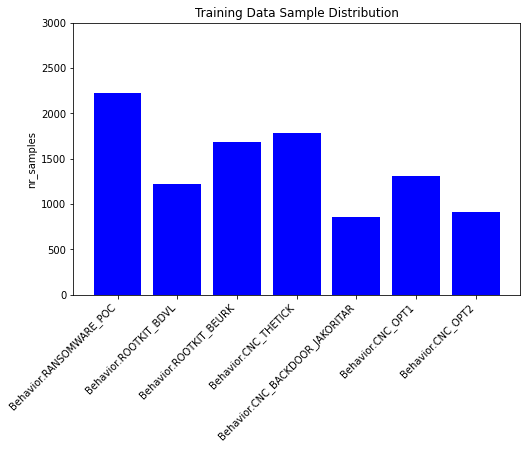

8


In [41]:
# Global Dependenciesfig = plt.gcf()
from src.custom_types import Behavior, MTDTechnique
from src.data_provider import DataProvider
import matplotlib.pyplot as plt
import numpy as np
#from src.agent import Agent
#from src.simulation_engine import SimulationEngine
from src.evaluation_utils import plot_learning, seed_random, get_pretrained_agent, evaluate_agent_on_afterstates
#fig.suptitle("Title centered above all subplots", fontsize=14)
plt.rcParams["figure.figsize"] = (8,5)

training_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
sample_frequencies = {}
for key, value in training_data.items():
    if key == Behavior.NORMAL:
        continue
    sample_frequencies[key] = len(value)
    

np_sample_frequencies = np.array(list(sample_frequencies.values()))
print(np_sample_frequencies)

sample_probabilities = np_sample_frequencies/np_sample_frequencies.sum(axis=0,keepdims=1)
print(sample_probabilities)
normalized_sample_probabilities = sample_probabilities*10000
print("")
plt.bar(range(len(normalized_sample_probabilities)), normalized_sample_probabilities, align='center', color='blue')
plt.xticks(range(len(normalized_sample_probabilities)), sample_frequencies.keys())
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 3000])
plt.title("Training Data Sample Distribution")
plt.ylabel('nr_samples')
plt.show()
        
print(len(train_data))

In [ ]:
#flattend_test_data = np.empty([0,47])
#for behavior_data in test_data.values():
#    flattend_test_data = np.concatenate((flattend_test_data, behavior_data), axis=0)
#
#print(flattend_test_data[:10]])

In [1]:
import os

def print_process_ids():
    pid = os.getpid()
    ppid = os.getppid()

    print("Parent Process ID of current process:", ppid)
    print("Process ID of current process:", pid)
    
print_process_ids()

Parent Process ID of current process: 54583
Process ID of current process: 54623


In [ ]:
def split_training_data(training_data, n_strides):
    strides = []
    for i in range(n_strides):
        strides.append(dict())

    for key, value in training_data.items():
        #print(f"{key} => {len(value)}")
        array_split = np.array_split(value, n_strides)
        for i in range(n_strides):
            strides[i][key] = array_split[i]
        
    return stridesap

-----------
#### Experiment 04

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 4
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

EPSILON_START = 1.0
EPSILON_DEC = 1e-4
EPSILON_END = 0.01
NR_ROUNDS = 10


seed_random()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.ROOTKIT_BEURK)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.CNC_BACKDOOR_JAKORITAR, Behavior.CNC_OPT1, Behavior.CNC_OPT2)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=1)

-----------
#### Experiment 05

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 5
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

seed_random()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.CNC_OPT1)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.ROOTKIT_BEURK , Behavior.CNC_OPT2, Behavior.CNC_BACKDOOR_JAKORITAR)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC, is_global_agent=True)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=1)

-----------
### Experiment 06

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 6
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)


seed_random()
start = time()

full_train_data, full_test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

subset_1 = (Behavior.NORMAL, Behavior.RANSOMWARE_POC, Behavior.ROOTKIT_BDVL, Behavior.CNC_BACKDOOR_JAKORITAR, Behavior.CNC_OPT1)
subset_2 = (Behavior.NORMAL, Behavior.CNC_THETICK, Behavior.ROOTKIT_BEURK , Behavior.CNC_OPT2)
sub_train_1 = {x: full_train_data[x] for x in subset_1 if x in full_train_data}
sub_train_2 = {x: full_train_data[x] for x in subset_2 if x in full_train_data}

environment_01 = SensorEnvironment(sub_train_1)
environment_02 = SensorEnvironment(sub_train_2)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC, is_global_agent=True)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)


server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)
# initialize memory replay buffer (randomly)
client_01.init_replay_memory(MIN_REPLAY_SIZE)
client_02.init_replay_memory(MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=1)


-----------
### Experiment 07

In [42]:
experiments = Experiment(original_working_directory_path)
experiment_id = 7
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)

environment_01 = SensorEnvironment(train_data)
environment_02 = SensorEnvironment(train_data)


global_agent = Agent(0, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_01 = Agent(1, input_dims=environment_01.observation_space_size, n_actions=len(environment_01.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

agent_02 = Agent(2, input_dims=environment_02.observation_space_size, n_actions=len(environment_02.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

client_01 = Client(1, agent_01, environment_01, experiment_path, MIN_REPLAY_SIZE)
client_02 = Client(2, agent_02, environment_02, experiment_path, MIN_REPLAY_SIZE)

server.add_client(client_01)
server.add_client(client_02)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION])

NameError: name 'Experiment' is not defined

-----------
#### Experiment 8.1

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 8
experiment_version = 1
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)


NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path, MIN_REPLAY_SIZE)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=1)

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 8
experiment_version = 2
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 10
NR_EPISODES_PER_ROUND=1000
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

# read in all preprocessed data for a simulated, supervised environment to sample from
train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

# train_data, test_data = DataProvider.get_reduced_dimensions_with_pca(DIMS, pi=PI, normal_only=True)
environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)



for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=1)

-----------
#### Experiment 09

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 9
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

# read in all preprocessed data for a simulated, supervised environment to sample from
train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

# train_data, test_data = DataProvider.get_reduced_dimensions_with_pca(DIMS, pi=PI, normal_only=True)
environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, full_test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)



for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    server.add_client(client)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=10)

In [ ]:
experiments = Experiment(original_working_directory_path)
experiment_id = 10
experiment_version = 0
experiment_path = experiments.get_experiment_path(experiment_id, experiment_version)

NR_ROUNDS = 100
NR_EPISODES_PER_ROUND=100
NR_CLIENTS = 5

environemnts = []
clients = []

seed_random()

train_data, test_data, _ = DataProvider.get_scaled_train_test_split(scaling_minmax=True, scale_normal_only=True)
training_data_strides = split_training_data(train_data, NR_CLIENTS)

environment = SensorEnvironment(train_data)
global_agent = Agent(0, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
                batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)

server = Server(global_agent, test_data, experiment_id, experiment_path, nr_rounds=NR_ROUNDS, nr_episodes_per_round=NR_EPISODES_PER_ROUND)

for behavior in Behavior:
    print(str(behavior).split('.')[1])

for i in range(NR_CLIENTS):
    id = i + 1
    environment = SensorEnvironment(training_data_strides[i])
    agent = Agent(id, input_dims=environment.observation_space_size, n_actions=len(environment.actions), buffer_size=BUFFER_SIZE,
              batch_size=BATCH_SIZE, lr=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON_START, eps_end=EPSILON_END, eps_dec=EPSILON_DEC)
    client = Client(id, agent, environment, experiment_path)
    client.init_replay_memory(MIN_REPLAY_SIZE)
    client.plot_training_data_split()
    server.add_client(client)

server.run_federation(evaluations=[Evaluation.PERFORMANCE_EVALUATION, Evaluation.LEARNING_CURVE], evaluation_frequency=10)